# Here we perform the backpropagation for other inputs and weights #

In [9]:
# Forward Pass
x = [2.0, -2.0, 1.0, 5.4, 2.3, 1.1]
w = [-3.0, -1.0, 2.0, 2.2, -1.0, -2.0]
b = [1.0] # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
xw3 = x[3] * w[3]
xw4 = x[4] * w[4]
xw5 = x[5] * w[5]


# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + xw3 + xw4 + xw5 + b[0]
print('z',z)
# ReLU activation function
y = max(z, 0)

print('y',y)
# Backward pass
# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

# Partial derivatives of the multiplication, the chain rule
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_dxw3 = 1
dsum_dxw4 = 1
dsum_dxw5 = 1

dsum_db = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_dxw3 = drelu_dz * dsum_dxw3
drelu_dxw4 = drelu_dz * dsum_dxw4
drelu_dxw5 = drelu_dz * dsum_dxw5
drelu_db = drelu_dz * dsum_db
print(drelu_dxw0, drelu_dxw1, drelu_dxw2 , drelu_dxw3 , drelu_dxw4 , drelu_dxw5, drelu_db)

# Partial derivatives of the multiplication, the chain rule
dmul_dx0 = w[0]
dmul_dx1 = w[1]
dmul_dx2 = w[2]
dmul_dx3 = w[3]
dmul_dx4 = w[4]
dmul_dx5 = w[5]

dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]
dmul_dw3 = x[3]
dmul_dw4 = x[4]
dmul_dw5 = x[5]

drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0

drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1

drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2

drelu_dx3 = drelu_dxw3 * dmul_dx3
drelu_dw3 = drelu_dxw3 * dmul_dw3

drelu_dx4 = drelu_dxw4 * dmul_dx4
drelu_dw4 = drelu_dxw4 * dmul_dw4

drelu_dx5 = drelu_dxw5 * dmul_dx5
drelu_dw5 = drelu_dxw5 * dmul_dw5

print(drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2, drelu_dx3, drelu_dw3, drelu_dx4, drelu_dw4, drelu_dx5, drelu_dw5)

z 6.380000000000003
y 6.380000000000003
1.0
1.0 1.0 1.0 1.0 1.0 1.0 1.0
-3.0 2.0 -1.0 -2.0 2.0 1.0 2.2 5.4 -1.0 2.3 -2.0 1.1


### The complete backpropagated would look like:

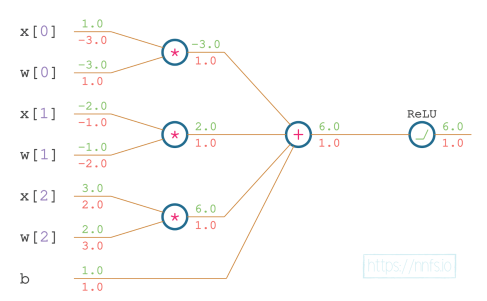

That’s the complete set of the activated neuron’s partial derivatives with respect to the inputs,
weights and a bias.

Recall the equation from the beginning of yesterday lecture:

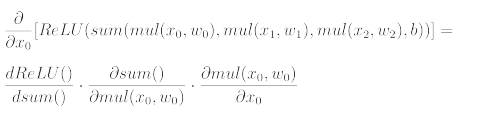

Since we have the complete code and we are applying the chain rule from this equation, let’s see what we can optimize in these calculations. We applied the chain rule to calculate the partial derivative of the ReLU activation function with respect to the first input, x0. In our code, let’s take the related lines of the code and simplify them:

1. drelu_dx0 = drelu_dxw0 * dmul_dx0
   - where:
   
   - dmul_dx0 = w[0]

then:
2. drelu_dx0 = drelu_dxw0 * w[0]

    - where:
    
    - drelu_dxw0 = drelu_dz * dsum_dxw0

then:
3. drelu_dx0 = drelu_dz * dsum_dxw0 * w[0]

    - where:
    
    - dsum_dxw0 = 1

then:
4. drelu_dx0 = drelu_dz * 1 * w[0] = drelu_dz * w[0]
    
    - where:
    
    - drelu_dz = dvalue * (1. if z > 0 else 0.)

then:
4. drelu_dx0 = dvalue * (1. if z > 0 else 0.) * w[0]


so the complete chain rule would be like:

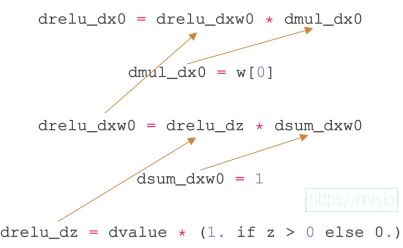

In the equation above, starting from the left-hand side, is the derivative calculated in the next layer, with respect to its inputs — this is the gradient backpropagated to the current layer, which is the derivative of the ReLU function, and the partial derivative of the neuron’s function with respect to
the x0 input. This is all multiplied by applying the chain rule to calculate the impact of the input to the neuron on the whole function’s output.



All together, the partial derivatives above, combined into a vector, make up our gradients which can be represented as:

dx = [drelu_dx0, drelu_dx1, drelu_dx2] # gradients on inputs

dw = [drelu_dw0, drelu_dw1, drelu_dw2] # gradients on weights

db = drelu_db # gradient on bias


For this single neuron example, we also won’t need our dx. With many layers, we will continue backpropagating to preceding layers with the partial derivative with respect to our inputs.

We can then apply a fraction of the gradients to these values:
w[0] += -0.001 * dw[0]

w[1] += -0.001 * dw[1]

w[2] += -0.001 * dw[2]

b += -0.001 * db

In [10]:
# Gradients

dx = [drelu_dx0, drelu_dx1, drelu_dx2] # gradients on inputs

dw = [drelu_dw0, drelu_dw1, drelu_dw2] # gradients on weights

db = drelu_db # gradient on 

# w = [-3.0, -1.0, 2.0] # weights
# b = 1.0 # bias


w[0] += -0.001 * dw[0]
w[1] += -0.001 * dw[1]
w[2] += -0.001 * dw[2]
b += -0.001 * db
print(w, b)

[-3.001, -0.998, 1.997] 0.999


In [11]:
# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)
print(y)

5.985


### We’ve successfully decreased this neuron’s output from 6.000 to 5.985. ###

In [12]:
#Numpy based implementation of the same work with 

import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# a vector of 1s
dvalues = np.array([[1., 1., 1.]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]).T
# Sum weights related to the given input multiplied by
# the gradient related to the given neuron
dx0 = sum([weights[0][0]*dvalues[0][0], weights[0][1]*dvalues[0][1],
weights[0][2]*dvalues[0][2]])
dx1 = sum([weights[1][0]*dvalues[0][0], weights[1][1]*dvalues[0][1],
weights[1][2]*dvalues[0][2]])
dx2 = sum([weights[2][0]*dvalues[0][0], weights[2][1]*dvalues[0][1],
weights[2][2]*dvalues[0][2]])
dx3 = sum([weights[3][0]*dvalues[0][0], weights[3][1]*dvalues[0][1],
weights[3][2]*dvalues[0][2]])
dinputs = np.array([dx0, dx1, dx2, dx3])
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]


In [13]:
# More simplified version of the above implementation

import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# a vector of 1s, 3 derivatives - one for each neuron
dvalues = np.array([[1., 1., 1.]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]).T

# weights related to the given input multiplied by
# gradient related to the given neuron

dx0 = sum(weights[0]*dvalues[0])
dx1 = sum(weights[1]*dvalues[0])
dx2 = sum(weights[2]*dvalues[0])
dx3 = sum(weights[3]*dvalues[0])
dinputs = np.array([dx0, dx1, dx2, dx3])
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]


In [14]:
# Further simplified using builtin funtions

import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# a vector of 1s
dvalues = np.array([[1., 1., 1.]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]).T
# sum weights of given input
# and multiply by the passed-in gradient for this neuron
dinputs = np.dot(dvalues[0], weights.T)
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]
